# House Prices: Advanced regression techniques
### Predict sales prices and practice feature engineering, RFs, and gradient boosting

### The competition: 
We’ll work through [the House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition. And you can find the data description [here.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) The descriptions of the features and some other helpful information are contained in a file with an obvious name, data_description.txt .


### Desciption:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### steps to cover:

* Data exploration
* Features engineering
* Features selection
* Model selection/tuning

### 1- Data exploration:

Firstly we need to download [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) in order to load in pandas and begin our processing.

In [1]:
## Acquiring of the data

import pandas as pd
import numpy as np

In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
## let's check data size
print("train: ",train.shape)
print("test: ",test.shape)

train:  (1460, 81)
test:  (1459, 80)


In [5]:
## Informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
### statistics
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


For our exploration we need to understand `data dictionary`, available [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

`The objective of the competition is to successfully predict the final house prices. To do this, let's try to find the features that can help us to do this.`

In [11]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [13]:
## let's explore the target variable "SalePrice"

train.SalePrice.describe(include="all")

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We see, the average sale price of a house in our dataset is close to `$180,000`, with most of the values falling within the `$130,000` to `$215,000` range.

Skew is: 1.8828757597682129


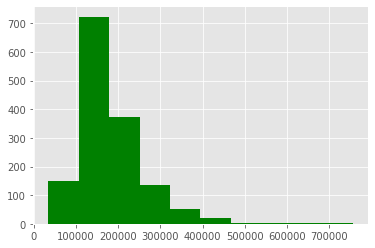

In [14]:
## Let's check this with a measure that allows us to measure the distribution of a series

print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='green')
plt.show()

Skew is: 0.12133506220520406


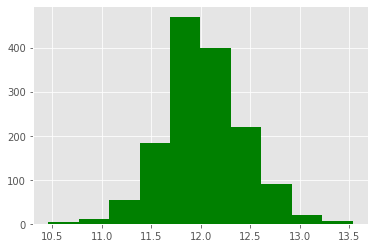

In [15]:
## Let's try to normalize our series with the log function and try the measurement again

target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='green')
plt.show()

We can see the distribution is more normal.

`We have explored our data and seen the characteristics of each variable now let's go to the next step.`

### 2- Features engineering:

In [17]:
## let's working with numeric variables

numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [20]:
## let's checking the relationships

corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:8], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-8:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
Name: SalePrice, dtype: float64 

MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


By visualizing our relationships, we will know which variables are likely to bias our predictions or not.

In [21]:
## Now let's dip in OverallQual variable
    
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The `OverallQual` data are integer values in the interval 1 to 10 inclusive.

We can create a pivot table to further investigate the relationship between `OverallQual` and `SalePrice`. The Pandas docs demonstrate how to accomplish this task. We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.

In [22]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [23]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


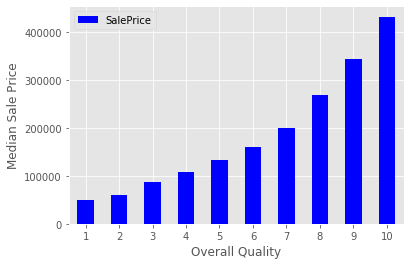

In [26]:
## Let's visualize this serie

quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that the median sales price strictly increases as Overall Quality increases.

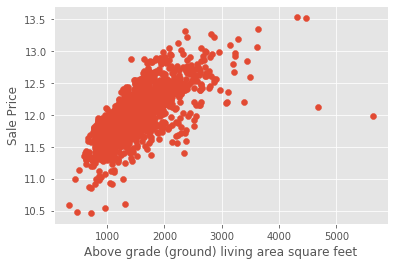

In [27]:
## Now visualizing the relation between the target variable and GrLiveArea variable

plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

At first glance, we see that increases in living area correspond to increases in price. We will do the same for `GarageArea`.

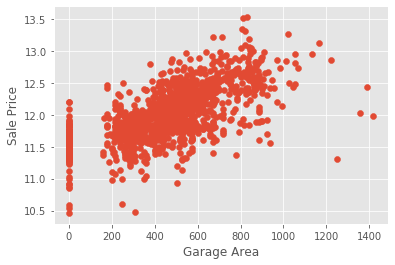

In [28]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Notice that there are many homes with `0` for `Garage Area`, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well. `Outliers` can affect a `regression model` by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data. Removing outliers is an art and a science. There are many techniques for dealing with outliers.

We will create a new dataframe with some outliers removed.

In [29]:
train = train[train['GarageArea'] < 1200]

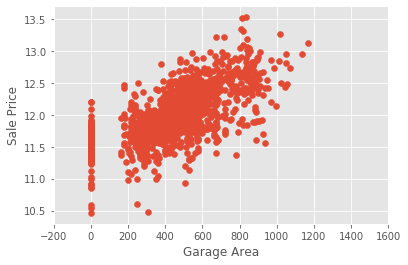

In [30]:
## let's take another look

plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

#### `Handling Null Values`

Next, we’ll examine the null or missing values.

We will create a DataFrame to view the top null columns. Chaining together the `train.isnull().sum()` methods, we return a Series of the counts of the null values in each column.

In [31]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


The documentation can help us understand the missing values. In the case of `PoolQC`, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
We can find a similar relationship between many of the Garage-related columns.

Let’s take a look at one of the other columns, `MiscFeature`. We’ll use the `Series.unique()` method to return a list of the unique values.

In [32]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


##### let's use the documentation to find out what these values indicate

MiscFeature: Miscellaneous feature not covered in other categories

   Elev Elevator
   Gar2 2nd Garage (if not described in garage section)
   Othr Other
   Shed Shed (over 100 SF)
   TenC Tennis Court
   NA   None

These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later. It’s important to gather domain knowledge in order to make the best decisions when dealing with missing data.

##### Wrangling the non-numeric Features

In [34]:
## let's considere the non-numeric features

categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


The count column indicates the count of non-null observations, while unique counts the number of unique values. top is the most commonly occurring value, with the frequency of the top value shown by freq.

For many of these features, we might want to use one-hot encoding to make use of the information for modeling.
One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

### 3- Features selection

When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

To demonstrate how this works, consider the Street data, which indicates whether there is Gravel or Paved road access to the property.

In [35]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In the `Street` column, the unique values are `Pave` and `Grvl`, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called `enc_street`. The `pd.get_dummies()` method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data.

In [37]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True).copy()
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True).copy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


The values agree. We’ve engineered our first feature! `Feature Engineering` is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the `Street` feature into a column of Boolean values, we engineered a feature.

Let’s try engineering another feature. We’ll look at SaleCondition by constructing and plotting a pivot table, as we did above for `OverallQual`.

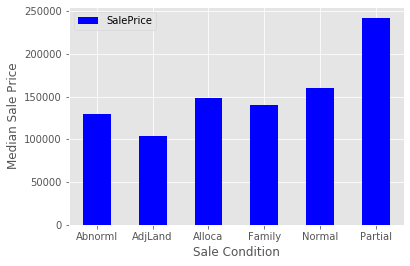

In [39]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where `SaleCondition` is equal to Patrial and assign the value `1`, otherwise assign `0`.

Follow a similar method that we used for Street above.

In [40]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


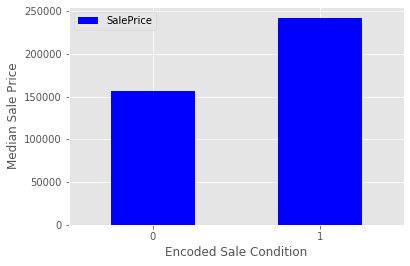

In [41]:
## Explore this new feature

condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

This looks great. You can continue to `work with more features to improve the ultimate performance of your model`.

Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference.

In [42]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [43]:
## check if all of the columns have 0 null values 

sum(data.isnull().sum() != 0)

0

### 4- Model selection/tuning

Let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. We use `np.log()` as explained above to transform the y variable for the model. `data.drop([features], axis=1)` tells pandas which columns we want to exclude. We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to `SalePrice`.

In [45]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

Let’s partition the data and start modeling.
We will use the train_test_split() function from `scikit-learn` to create a training set and a `hold-out` set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

`train_test_split()` returns four objects:

* X_train is the subset of our features used for training.
* X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
* y_train is the target variable SalePrice which corresponds to X_train.
* y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set `random_state=42`. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

`Begin modelling`
We will first create a Linear Regression model. First, we instantiate the model.

In [47]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we’ll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [48]:
model = lr.fit(X_train, y_train)

`Evaluate the performance and visualize results`
Now, we want to evaluate the performance of the model.
Each competition might evaluate the sublessons differently. In this competition, Kaggle will evaluate our sublesson using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

`The model.score()` method returns the r-squared value by default.

In [49]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262514


In [50]:
predictions = model.predict(X_test)

The `model.predict()` method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

The `mean_squared_error` function takes two arrays and calculates the rmse.

In [51]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519568195


Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship graphically with a scatter plot.

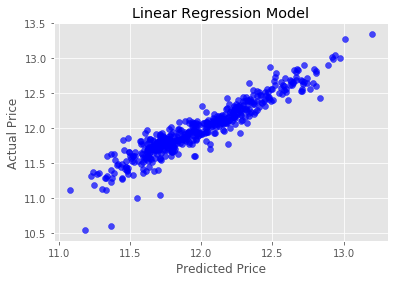

In [52]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

##### Try to improve the model

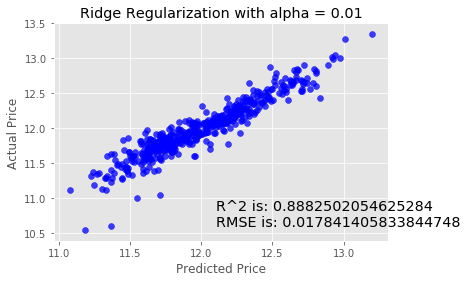

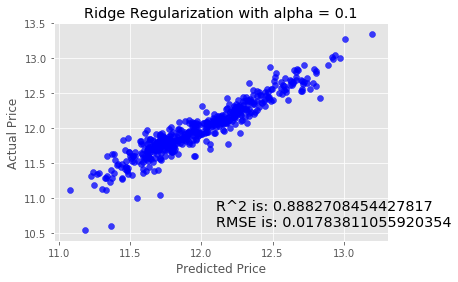

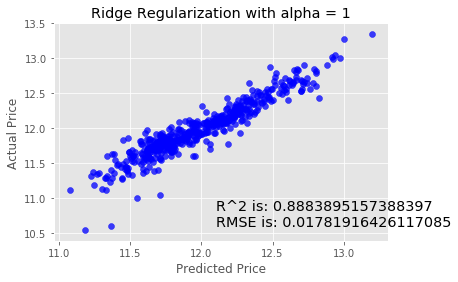

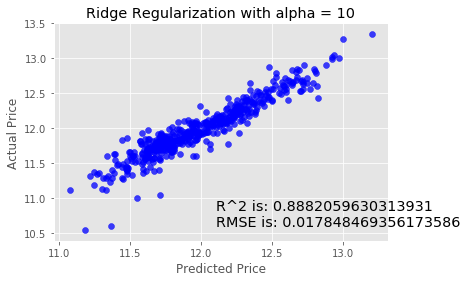

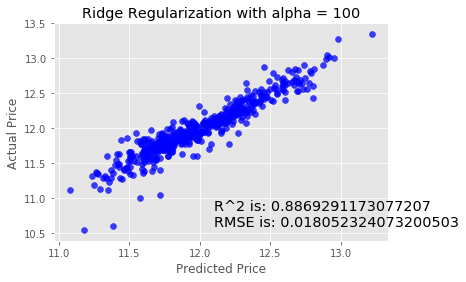

In [53]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularization can be helpful. Repeat this step after you’ve added more features.

##### `Make a sublesson`

We’ll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

We’ll log in to our Kaggle account and go to the sublesson page to make a sublesson.
We will use the DataFrame.to_csv() to create a csv to submit.
The first column must the contain the ID from the test data.

In [54]:
sublesson = pd.DataFrame()
sublesson['Id'] = test.Id

In [55]:
## Now, select the features from the test data for the model as we did above.

feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [56]:
## Next, we generate our predictions.

predictions = model.predict(feats)

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [57]:
final_predictions = np.exp(predictions)

In [58]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions are: 
 [128959.49172586 122920.74024355 175704.82598102 200050.83263755
 182075.46986405]


In [59]:
## Lets assign these predictions and check that everything looks good.

sublesson['SalePrice'] = final_predictions
sublesson.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


One we’re confident that we’ve got the data arranged in the proper format, we can export to a .csv file as Kaggle expects. We pass index=False because Pandas otherwise would create a new index for us.

In [60]:
## sublesson.to_csv('sublesson1.csv', index=False)